<a href="https://colab.research.google.com/github/YellaCRE/SportRecog/blob/main/%EB%AC%B8%ED%99%94_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기

In [ ]:
import os
import pandas as pd
pd.set_option('mode.chained_assignment',  None) #수정오류 무시
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
path = "/content/drive/MyDrive/2022 휴학/문화관광공모전/data/"
#csv 형식으로 된 데이터 파일을 읽어옵니다. 
data = pd.read_csv(path + "person_data.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

#clustering

경험해본 스포츠 여가활동

In [ ]:
col_list = data.columns
df_exp = data[col_list[col_list.str.contains('Q1_')==True]]
sport_list = ['Q1_16','Q1_17','Q1_18','Q1_19','Q1_20','Q1_21','Q1_22','Q1_23','Q1_24','Q1_25','Q1_26','Q1_27',
              'Q1_28','Q1_29','Q1_30','Q1_31','Q1_32','Q1_33','Q1_34','Q1_35','Q1_36','Q1_37','Q1_55']
df_exp = df_exp[sport_list]
df_exp.head()

,Q1_16,Q1_17,Q1_18,Q1_19,Q1_20,Q1_21,Q1_22,Q1_23,Q1_24,Q1_25,...,Q1_29,Q1_30,Q1_31,Q1_32,Q1_33,Q1_34,Q1_35,Q1_36,Q1_37,Q1_55
0,1,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


#K-means 클러스터링

In [ ]:
def elbow(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

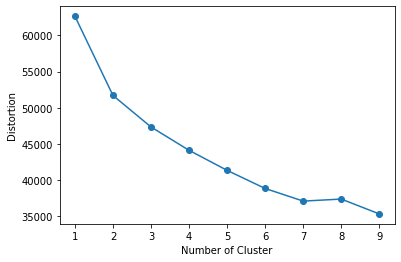

In [ ]:
elbow(df_exp)

In [ ]:
model = KMeans(n_clusters=7,random_state=1004)
model.fit(df_exp)
df_exp['cluster'] = model.fit_predict(df_exp)
#cluster속성 생성
data['cluster'] = df_exp['cluster']
#경험데이터 삭제
data.drop(col_list[col_list.str.contains('Q1_')==True], axis = 1, inplace = True)

In [ ]:
clu = pd.concat([data['ID'],df_exp['cluster']],axis = 1)

In [ ]:
df_exp.groupby('cluster').size().sort_values(ascending=False)

cluster
2    12414
0     9075
5     5310
6     4492
1     4100
3     3086
4     2218
dtype: int64

In [ ]:
data[data['ID'].isin(clu.ID[clu['cluster']==2])].groupby('Q4_1').size().sort_values(ascending=False).head(10)

Q4_1
취미생활중            4050
사교활동             1983
취미생활여            1604
여행               1385
예술관람              854
취미생활남             777
헬스(보디빌딩)/에어로빅     340
예술체험              298
요가/필라테스/태보        241
기타                184
dtype: int64

데이터저장

In [ ]:
data.to_csv(path+'person_data_clu.csv')